In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from jy_strategy import Strategy,SMA,MACD,Param,Kalman,HP,Linear_Model
from matplotlib import pylab
from jy_center import Center_Param, Center

In [2]:
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 6)
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C = Center(C_param)   # 实例化交易中心变量

df = pd.read_csv("600005.XSHG.csv") #导入测试数据

real date:2009-12-31
[[ 7.22      ]
 [ 7.17497751]
 [ 7.14326562]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
money:1431526.6399999997
cangwei:0
roi:0.4315266399999997
alpha:-0.56133692008
beta:1.60299693382
algorithem volatility: 5.70308614867
bench volatility: 3.22398130464
sharpe ratio: 0.179720211421
max drawdown: 0.4741751138320822
win ratio:0.19649122807017544
transfer times:26
1425


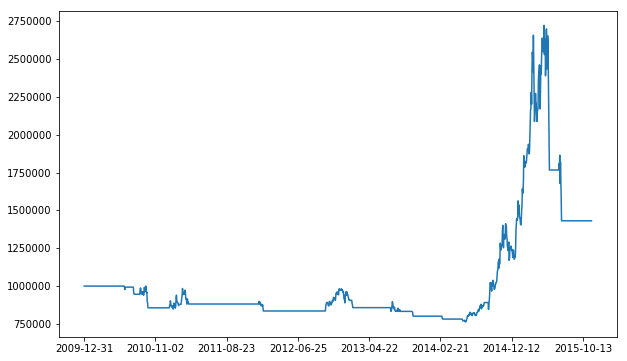

In [5]:
p=[0,1,1,0.001]
C.choose_strategy(Kalman("a", df,p))
C.current_strategy.MOM = 5
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-08-03,4.32,231481.0,1.0,143.0,0.003792
1,ss,2010-08-06,4.29,231481.0,-1.0,146.0,-0.003029
2,ss,2010-09-08,4.43,224166.0,1.0,169.0,0.006184
3,ss,2010-09-14,4.22,224166.0,-1.0,173.0,-0.003027
4,ss,2010-10-13,4.54,208365.0,1.0,186.0,0.012695
5,ss,2010-11-16,4.11,208365.0,-1.0,210.0,-0.008445
6,ss,2011-02-16,4.10,208874.0,1.0,270.0,0.004837
7,ss,2011-05-09,4.22,208874.0,-1.0,325.0,-0.002111
8,ss,2012-02-24,3.06,288055.0,1.0,520.0,0.002628
9,ss,2012-03-15,2.90,288055.0,-1.0,534.0,-0.002908


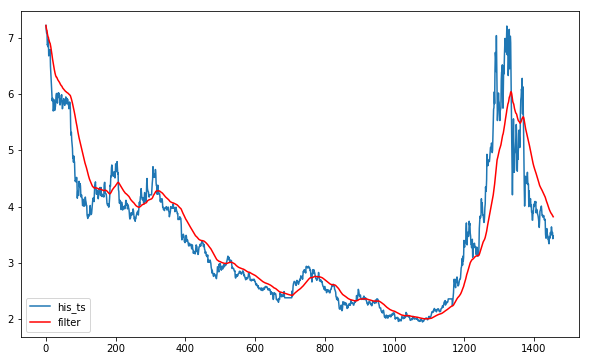

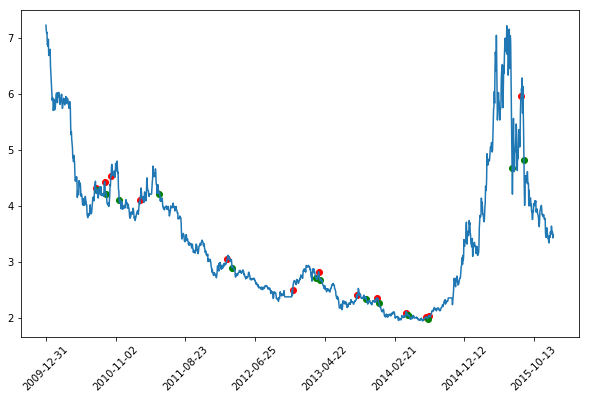

In [6]:
C.print_plot_filter()
C.print_trade_log_pic()
C.trade_log

real date:2009-12-31
[[ 7.22      ]
 [ 7.17497751]
 [ 7.14326562]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
money:1220392.9699999997
cangwei:0
roi:0.22039296999999974
alpha:-0.622977889429
beta:1.63557776773
algorithem volatility: 5.94252740327
bench volatility: 3.22398130464
sharpe ratio: 0.167531458477
max drawdown: 0.5729551610448939
win ratio:0.20350877192982456
transfer times:18


,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-10-15,4.69,213219.0,1.0,188.0,0.013357
1,ss,2010-11-19,4.11,213219.0,-1.0,213.0,-0.016303
2,ss,2011-02-18,4.18,209649.0,1.0,272.0,0.005917
3,ss,2011-05-11,4.18,209649.0,-1.0,327.0,-0.003737
4,ss,2012-02-27,3.09,283602.0,1.0,521.0,0.001367
5,ss,2012-03-16,2.92,283602.0,-1.0,535.0,-0.001922
6,ss,2012-11-30,2.59,319737.0,1.0,709.0,0.000179
7,ss,2013-03-20,2.73,319737.0,-1.0,779.0,-0.002897
8,ss,2013-09-06,2.36,369866.0,1.0,893.0,0.000544
9,ss,2013-10-25,2.28,369866.0,-1.0,921.0,-0.003263


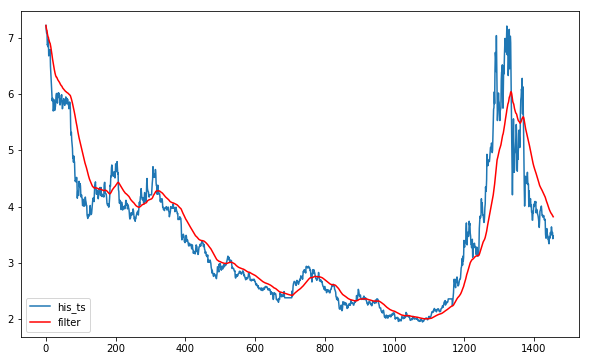

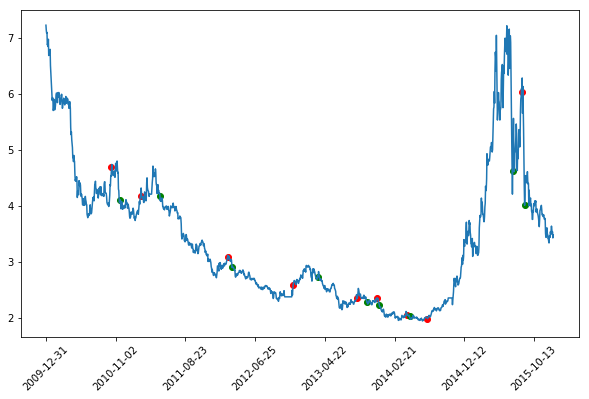

In [7]:
p=[0,1,1,0.001]
C.choose_strategy(Kalman("a", df,p))
C.current_strategy.MOM = 10
C.run_test()
C.print_result()
C.print_plot_filter()
C.print_trade_log_pic()
C.trade_log

real date:2009-12-31
money:1819729.7599999998
cangwei:0
roi:0.8197297599999998
alpha:-0.746106940947
beta:1.83598160766
algorithem volatility: 6.51583066297
bench volatility: 3.22398130464
sharpe ratio: 0.164330121758
max drawdown: 0.416088639326594
win ratio:0.22596491228070176
transfer times:14


,name,time,price,tick,Signal,his_ts_index,trend
0,ss,2010-08-09,4.29,233100.0,1.0,147.0,0.000287
1,ss,2010-11-24,3.95,233100.0,-1.0,216.0,-0.003819
2,ss,2011-02-22,4.24,217157.0,1.0,274.0,0.002129
3,ss,2011-05-19,4.14,217157.0,-1.0,333.0,-0.001779
4,ss,2012-02-23,3.03,296709.0,1.0,519.0,0.000226
5,ss,2012-03-28,2.75,296709.0,-1.0,543.0,-0.001019
6,ss,2012-11-30,2.59,315039.0,1.0,709.0,0.002388
7,ss,2013-03-21,2.76,315039.0,-1.0,780.0,-0.000934
8,ss,2013-09-04,2.42,359300.0,1.0,891.0,0.000986
9,ss,2013-11-06,2.31,359300.0,-1.0,929.0,-0.000360


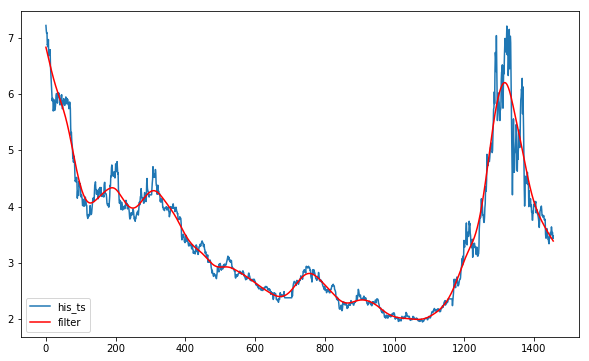

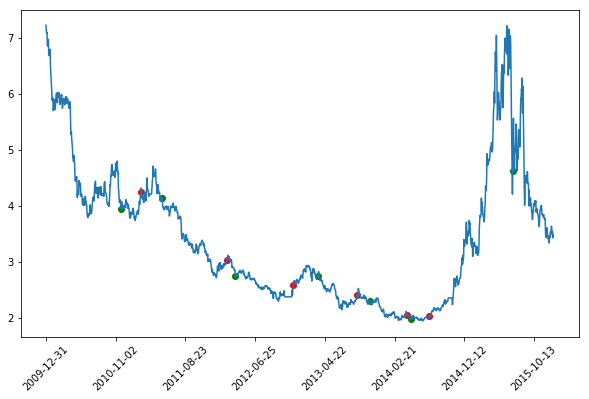

In [3]:
C.choose_strategy(HP("a", df,100000))
C.current_strategy.MOM = 5
C.run_test()
C.print_result()
C.print_plot_filter()
C.print_trade_log_pic()
C.trade_log